## TASK 4 - Face Mask Detection using Convolutional Neural Networks

Group Number: 5


In [1]:
%load_ext autoreload
%autoreload 1
%aimport my_model, utils, my_datamodule, my_model, my_trainer
%matplotlib inline
import os

import numpy as np
import torch
from torchinfo import summary

import my_datamodule
import my_model
import my_trainer
import utils

torch.manual_seed(30)
np.random.seed(30)

if not os.path.exists(os.path.join(os.getcwd(), 'results')):
    os.makedirs(os.path.join(os.getcwd(), 'results'))

# Check GPU connection
gpu_active = torch.cuda.is_available()
print("GPU is used" if gpu_active else "CPU is used")


GPU is used


### 1. Data import and Preparation

In TASK3 we used a common computer vision processing step for classification problems in computer vision - manual feature extraction. This time we want to use a learning approach which does not need handcrafted inputs. 

Implement the **get_transforms** method. Make sure it returns a transformation that maps input images to tensor values and resizes them to a square image.

For simplicity and actuality you will detect if a person wears a face mask or not. Follow the instructions in the assignment description. Implement the get_transform method of **my_datamodule.DataModule** and create an instance of **DataModule**. Use an image size of 64 and a batch_size around **64**. Depending on your processor you can increase the amount of threads that load data with the parameter **num_worker**. For example use **num_workers=4** to start four worker threads for data loading and preprocessing. 

In [2]:
dm = my_datamodule.DataModule("facemask", 64, 64, False, num_workers=4)

len(dm.train_dataloader()), len(dm.val_dataloader())

(42, 12)

### 2. Simple Face Mask Detection CNN
#### 2.1 Network Structure

This section will familiarize you with the steps of creating a deep artificial neural network from scratch. Implement the **__init__** and **forward** methods of **my_model.MaskClassifier** according to the instructions.

Create a simple classification model using ***model=my_model.MaskClassifier(..)***. Set the image size to **64** (the dataset will be proccessed to squared images) and drop out value to **0**.

Take a look at the structure of your model by calling ***summary(model, (32, 3, img_size, img_size))***

In [3]:
model = my_model.MaskClassifier(name="model_simple", img_size=64, dropout=0, batch_norm=False)

summary(model, (32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
MaskClassifier                           [32, 1]                   --
├─Conv2d: 1-1                            [32, 32, 62, 62]          896
├─Identity: 1-2                          [32, 32, 62, 62]          --
├─MaxPool2d: 1-3                         [32, 32, 31, 31]          --
├─Conv2d: 1-4                            [32, 32, 29, 29]          9,248
├─Identity: 1-5                          [32, 32, 29, 29]          --
├─MaxPool2d: 1-6                         [32, 32, 14, 14]          --
├─Dropout: 1-7                           [32, 6272]                --
├─Linear: 1-8                            [32, 1]                   6,273
Total params: 16,417
Trainable params: 16,417
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 359.30
Input size (MB): 1.57
Forward/backward pass size (MB): 38.38
Params size (MB): 0.07
Estimated Total Size (MB): 40.02

***
#### Q1: Take a look at the structure of the MaskClassifier CNN. What does the column 'Output Shape' represent? What does the column Param represent? Why is the shape decreasing? Finally, explain why the last layer has length 1. 

Output shape is the dimension of the data after they have been processed by the specific layer.

Params are the learnable weights (kernels + bias).

The last layer has length 1 because we have a single probability score at the end (mask vs no mask).

#### 2.2 Training 

In this step you will train the model with the training and validation data set iterator. The **my_trainer** module provides functionality for training and logging the learning progress.

First create a trainer instance using my_trainer.Trainer(...) and pass the previosuly created model and datamodule to it. If you have a device that supports cuda you can pass **gpu=True** to speed up training. Use trainer.fit(...) to start the training process. Depending on wether you use a GPU or CPU and the number of epochs, the training can take a while. Start with a learning rate of **0.0001** and **50** epochs. The loss should decrease and the accuracy on the validation should increase. The weights of the best model are saved in separate files in your results directory automatically.

In [4]:
trainer = my_trainer.Trainer(model, dm, True)
trainer.fit(epochs=50, lr=0.0001)

Epoch 0: 100%|██████████| 42/42 [00:24<00:00,  1.72it/s]


Epoch 0 Training: Loss: 0.6452214121818542 Accuracy: 0.6913060545921326
Epoch 0 Validation: Loss: 0.5716679692268372 Accuracy: 0.8304687142372131


Epoch 1: 100%|██████████| 42/42 [00:14<00:00,  2.92it/s]


Epoch 1 Training: Loss: 0.46806731820106506 Accuracy: 0.8661858439445496
Epoch 1 Validation: Loss: 0.36461761593818665 Accuracy: 0.8941840529441833


Epoch 2: 100%|██████████| 42/42 [00:23<00:00,  1.79it/s]


Epoch 2 Training: Loss: 0.32279855012893677 Accuracy: 0.8873339891433716
Epoch 2 Validation: Loss: 0.27145516872406006 Accuracy: 0.9046006798744202


Epoch 3: 100%|██████████| 42/42 [00:22<00:00,  1.87it/s]


Epoch 3 Training: Loss: 0.2742145359516144 Accuracy: 0.8969780206680298
Epoch 3 Validation: Loss: 0.24651797115802765 Accuracy: 0.9059895873069763


Epoch 4: 100%|██████████| 42/42 [00:23<00:00,  1.77it/s]


Epoch 4 Training: Loss: 0.2541731595993042 Accuracy: 0.9025583863258362
Epoch 4 Validation: Loss: 0.22981049120426178 Accuracy: 0.9124999642372131


Epoch 5: 100%|██████████| 42/42 [00:23<00:00,  1.78it/s]


Epoch 5 Training: Loss: 0.24397972226142883 Accuracy: 0.9049049615859985
Epoch 5 Validation: Loss: 0.2154891937971115 Accuracy: 0.9229166507720947


Epoch 6: 100%|██████████| 42/42 [00:23<00:00,  1.77it/s]


Epoch 6 Training: Loss: 0.23301012814044952 Accuracy: 0.9147493243217468
Epoch 6 Validation: Loss: 0.204582080245018 Accuracy: 0.9294270873069763


Epoch 7: 100%|██████████| 42/42 [00:23<00:00,  1.78it/s]


Epoch 7 Training: Loss: 0.2260560542345047 Accuracy: 0.9146634936332703
Epoch 7 Validation: Loss: 0.20339703559875488 Accuracy: 0.9281249642372131


Epoch 8: 100%|██████████| 42/42 [00:23<00:00,  1.78it/s]


Epoch 8 Training: Loss: 0.2179698497056961 Accuracy: 0.9192994236946106
Epoch 8 Validation: Loss: 0.19686681032180786 Accuracy: 0.9295139312744141


Epoch 9: 100%|██████████| 42/42 [00:25<00:00,  1.67it/s]


Epoch 9 Training: Loss: 0.21110665798187256 Accuracy: 0.925251841545105
Epoch 9 Validation: Loss: 0.1893390268087387 Accuracy: 0.9321181178092957


Epoch 10: 100%|██████████| 42/42 [00:25<00:00,  1.65it/s]


Epoch 10 Training: Loss: 0.20587250590324402 Accuracy: 0.9265396595001221
Epoch 10 Validation: Loss: 0.18761050701141357 Accuracy: 0.9360243678092957


Epoch 11: 100%|██████████| 42/42 [00:23<00:00,  1.82it/s]


Epoch 11 Training: Loss: 0.20111310482025146 Accuracy: 0.9257096648216248
Epoch 11 Validation: Loss: 0.1814209669828415 Accuracy: 0.9333333373069763


Epoch 12: 100%|██████████| 42/42 [00:23<00:00,  1.77it/s]


Epoch 12 Training: Loss: 0.19939954578876495 Accuracy: 0.9257096648216248
Epoch 12 Validation: Loss: 0.1775071769952774 Accuracy: 0.9359374642372131


Epoch 13: 100%|██████████| 42/42 [00:20<00:00,  2.01it/s]


Epoch 13 Training: Loss: 0.1940879374742508 Accuracy: 0.926825761795044
Epoch 13 Validation: Loss: 0.17516760528087616 Accuracy: 0.9372395873069763


Epoch 14: 100%|██████████| 42/42 [00:22<00:00,  1.91it/s]


Epoch 14 Training: Loss: 0.19214995205402374 Accuracy: 0.9287144541740417
Epoch 14 Validation: Loss: 0.17208881676197052 Accuracy: 0.9372395873069763


Epoch 15: 100%|██████████| 42/42 [00:23<00:00,  1.77it/s]


Epoch 15 Training: Loss: 0.19134309887886047 Accuracy: 0.928972065448761
Epoch 15 Validation: Loss: 0.17509819567203522 Accuracy: 0.9333333373069763


Epoch 16: 100%|██████████| 42/42 [00:25<00:00,  1.66it/s]


Epoch 16 Training: Loss: 0.18574924767017365 Accuracy: 0.9324920177459717
Epoch 16 Validation: Loss: 0.16692529618740082 Accuracy: 0.9346354007720947


Epoch 17: 100%|██████████| 42/42 [00:15<00:00,  2.78it/s]


Epoch 17 Training: Loss: 0.18010786175727844 Accuracy: 0.9322344660758972
Epoch 17 Validation: Loss: 0.1877707690000534 Accuracy: 0.937413215637207


Epoch 18: 100%|██████████| 42/42 [00:22<00:00,  1.86it/s]


Epoch 18 Training: Loss: 0.1758553832769394 Accuracy: 0.9328640699386597
Epoch 18 Validation: Loss: 0.1666431576013565 Accuracy: 0.9358506798744202


Epoch 19: 100%|██████████| 42/42 [00:22<00:00,  1.89it/s]


Epoch 19 Training: Loss: 0.17330960929393768 Accuracy: 0.9374141693115234
Epoch 19 Validation: Loss: 0.16164427995681763 Accuracy: 0.9372395873069763


Epoch 20: 100%|██████████| 42/42 [00:24<00:00,  1.71it/s]


Epoch 20 Training: Loss: 0.1711902916431427 Accuracy: 0.9374427795410156
Epoch 20 Validation: Loss: 0.17521798610687256 Accuracy: 0.9334201812744141


Epoch 21: 100%|██████████| 42/42 [00:20<00:00,  2.04it/s]


Epoch 21 Training: Loss: 0.16740496456623077 Accuracy: 0.9359546899795532
Epoch 21 Validation: Loss: 0.16653309762477875 Accuracy: 0.9334201812744141


Epoch 22: 100%|██████████| 42/42 [00:22<00:00,  1.87it/s]


Epoch 22 Training: Loss: 0.16716143488883972 Accuracy: 0.9394745826721191
Epoch 22 Validation: Loss: 0.16700194776058197 Accuracy: 0.9360243678092957


Epoch 23: 100%|██████████| 42/42 [00:24<00:00,  1.74it/s]


Epoch 23 Training: Loss: 0.1631961166858673 Accuracy: 0.943023145198822
Epoch 23 Validation: Loss: 0.15612365305423737 Accuracy: 0.9372395873069763


Epoch 24: 100%|██████████| 42/42 [00:23<00:00,  1.78it/s]


Epoch 24 Training: Loss: 0.160671666264534 Accuracy: 0.940018355846405
Epoch 24 Validation: Loss: 0.15765289962291718 Accuracy: 0.9412326812744141


Epoch 25: 100%|██████████| 42/42 [00:22<00:00,  1.85it/s]


Epoch 25 Training: Loss: 0.15811049938201904 Accuracy: 0.9419928789138794
Epoch 25 Validation: Loss: 0.15714305639266968 Accuracy: 0.9451389312744141


Epoch 26: 100%|██████████| 42/42 [00:20<00:00,  2.00it/s]


Epoch 26 Training: Loss: 0.1563388854265213 Accuracy: 0.9443967938423157
Epoch 26 Validation: Loss: 0.16125920414924622 Accuracy: 0.9347222447395325


Epoch 27: 100%|██████████| 42/42 [00:22<00:00,  1.87it/s]


Epoch 27 Training: Loss: 0.15481607615947723 Accuracy: 0.9440247416496277
Epoch 27 Validation: Loss: 0.15307185053825378 Accuracy: 0.9438368678092957


Epoch 28: 100%|██████████| 42/42 [00:21<00:00,  1.99it/s]


Epoch 28 Training: Loss: 0.15210574865341187 Accuracy: 0.9453411102294922
Epoch 28 Validation: Loss: 0.15405099093914032 Accuracy: 0.9424479007720947


Epoch 29: 100%|██████████| 42/42 [00:20<00:00,  2.03it/s]


Epoch 29 Training: Loss: 0.14973855018615723 Accuracy: 0.9448546171188354
Epoch 29 Validation: Loss: 0.1530947983264923 Accuracy: 0.9411458373069763


Epoch 30: 100%|██████████| 42/42 [00:11<00:00,  3.74it/s]


Epoch 30 Training: Loss: 0.14826366305351257 Accuracy: 0.9452266693115234
Epoch 30 Validation: Loss: 0.15363983809947968 Accuracy: 0.9477431178092957


Epoch 31: 100%|██████████| 42/42 [00:16<00:00,  2.48it/s]


Epoch 31 Training: Loss: 0.1469380110502243 Accuracy: 0.9477450251579285
Epoch 31 Validation: Loss: 0.16150470077991486 Accuracy: 0.9412326812744141


Epoch 32: 100%|██████████| 42/42 [00:20<00:00,  2.05it/s]


Epoch 32 Training: Loss: 0.14541253447532654 Accuracy: 0.9495192170143127
Epoch 32 Validation: Loss: 0.15048867464065552 Accuracy: 0.9451389312744141


Epoch 33: 100%|██████████| 42/42 [00:22<00:00,  1.90it/s]


Epoch 33 Training: Loss: 0.1435258388519287 Accuracy: 0.9477450251579285
Epoch 33 Validation: Loss: 0.15529705584049225 Accuracy: 0.9398437142372131


Epoch 34: 100%|██████████| 42/42 [00:21<00:00,  1.98it/s]


Epoch 34 Training: Loss: 0.14243373274803162 Accuracy: 0.9476590752601624
Epoch 34 Validation: Loss: 0.15179036557674408 Accuracy: 0.9477431178092957


Epoch 35: 100%|██████████| 42/42 [00:21<00:00,  1.93it/s]


Epoch 35 Training: Loss: 0.13909654319286346 Accuracy: 0.950263261795044
Epoch 35 Validation: Loss: 0.14618228375911713 Accuracy: 0.9464409947395325


Epoch 36: 100%|██████████| 42/42 [00:21<00:00,  1.92it/s]


Epoch 36 Training: Loss: 0.13810083270072937 Accuracy: 0.9501774311065674
Epoch 36 Validation: Loss: 0.15231701731681824 Accuracy: 0.9490451812744141


Epoch 37: 100%|██████████| 42/42 [00:21<00:00,  1.95it/s]


Epoch 37 Training: Loss: 0.13704970479011536 Accuracy: 0.9510931968688965
Epoch 37 Validation: Loss: 0.15161870419979095 Accuracy: 0.9451389312744141


Epoch 38: 100%|██████████| 42/42 [00:21<00:00,  1.99it/s]


Epoch 38 Training: Loss: 0.13485705852508545 Accuracy: 0.9540980458259583
Epoch 38 Validation: Loss: 0.14640885591506958 Accuracy: 0.9516493678092957


Epoch 39: 100%|██████████| 42/42 [00:21<00:00,  1.97it/s]


Epoch 39 Training: Loss: 0.13229764997959137 Accuracy: 0.9528673887252808
Epoch 39 Validation: Loss: 0.14558453857898712 Accuracy: 0.9516493678092957


Epoch 40: 100%|██████████| 42/42 [00:22<00:00,  1.88it/s]


Epoch 40 Training: Loss: 0.1312928944826126 Accuracy: 0.9535256624221802
Epoch 40 Validation: Loss: 0.14623774588108063 Accuracy: 0.9477431178092957


Epoch 41: 100%|██████████| 42/42 [00:23<00:00,  1.78it/s]


Epoch 41 Training: Loss: 0.1288784295320511 Accuracy: 0.9551854729652405
Epoch 41 Validation: Loss: 0.1509258896112442 Accuracy: 0.9425347447395325


Epoch 42: 100%|██████████| 42/42 [00:24<00:00,  1.69it/s]


Epoch 42 Training: Loss: 0.12834365665912628 Accuracy: 0.9541552662849426
Epoch 42 Validation: Loss: 0.15055526793003082 Accuracy: 0.9438368678092957


Epoch 43: 100%|██████████| 42/42 [00:16<00:00,  2.48it/s]


Epoch 43 Training: Loss: 0.12902876734733582 Accuracy: 0.9560153484344482
Epoch 43 Validation: Loss: 0.1560230404138565 Accuracy: 0.9411458373069763


Epoch 44: 100%|██████████| 42/42 [00:21<00:00,  2.00it/s]


Epoch 44 Training: Loss: 0.12569782137870789 Accuracy: 0.9539834856987
Epoch 44 Validation: Loss: 0.14319826662540436 Accuracy: 0.9464409947395325


Epoch 45: 100%|██████████| 42/42 [00:20<00:00,  2.01it/s]


Epoch 45 Training: Loss: 0.12384908646345139 Accuracy: 0.9565876722335815
Epoch 45 Validation: Loss: 0.1467335969209671 Accuracy: 0.9490451812744141


Epoch 46: 100%|██████████| 42/42 [00:21<00:00,  1.91it/s]


Epoch 46 Training: Loss: 0.12136229872703552 Accuracy: 0.9574176073074341
Epoch 46 Validation: Loss: 0.1431334763765335 Accuracy: 0.9451389312744141


Epoch 47: 100%|██████████| 42/42 [00:22<00:00,  1.90it/s]


Epoch 47 Training: Loss: 0.12131829559803009 Accuracy: 0.9566735625267029
Epoch 47 Validation: Loss: 0.1471468061208725 Accuracy: 0.9438368678092957


Epoch 48: 100%|██████████| 42/42 [00:22<00:00,  1.84it/s]


Epoch 48 Training: Loss: 0.1206178218126297 Accuracy: 0.9573317170143127
Epoch 48 Validation: Loss: 0.14271189272403717 Accuracy: 0.9490451812744141


Epoch 49: 100%|██████████| 42/42 [00:20<00:00,  2.08it/s]


Epoch 49 Training: Loss: 0.1176672875881195 Accuracy: 0.9587053656578064
Epoch 49 Validation: Loss: 0.14920175075531006 Accuracy: 0.9438368678092957


#### 1.3 Performance Evaluation 

Test the model with **trainer.test()** and plot the model performance of the last training session with ***plot_performance(..)***.

***Submission:*** Save the output of ***trainer.plot_performance(..)*** as **task4_model_simple.png**

d:\uni\CV\CV_Assignment2_Group5\TASK4\my_trainer.py:220: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(self._get_path()))


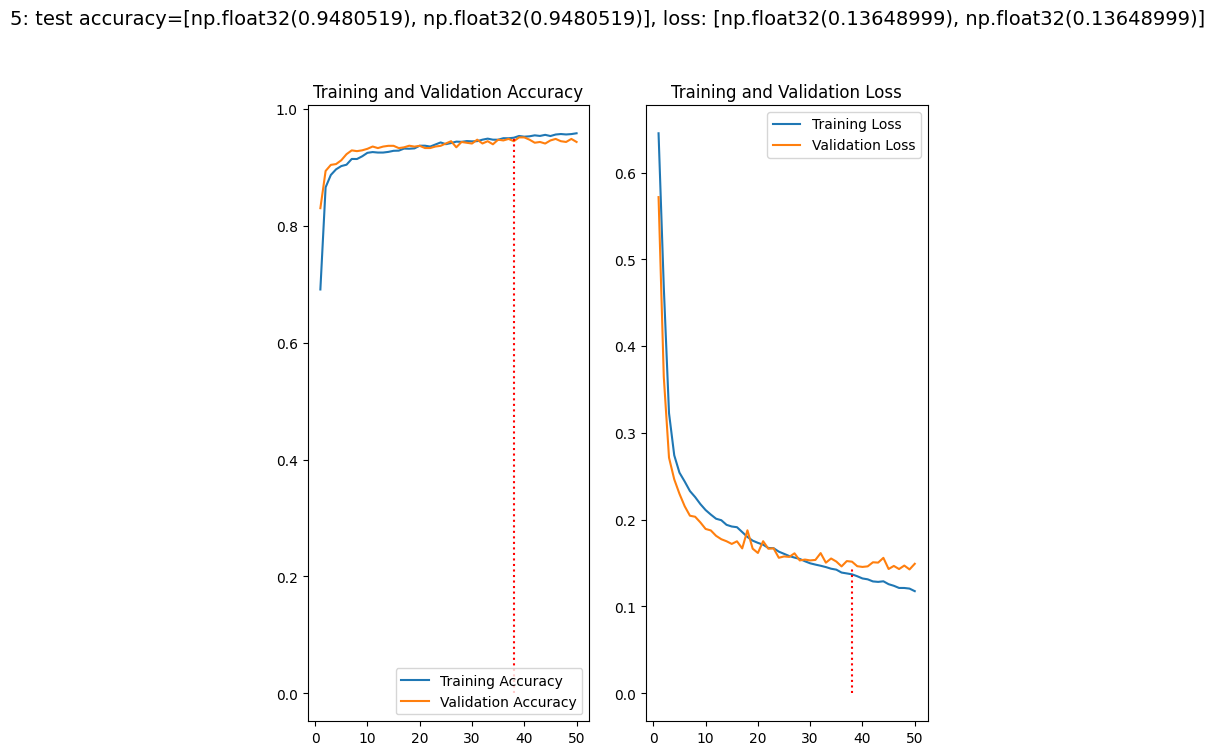

In [5]:
trainer.test()

trainer.plot_performance("task4_model_simple", 5)

***
#### Q2: What values are optimized during the training process of a CNN? Why isn't the validation accuracy increasing after some time? Why do we use a validation dataset?

The weights and biases of the convolutional and linear layers.

The validation accuracy isn't increasing because the model is overfitting.

We use a validation dataset for that purpose, to detect overfitting, or more generally, to test the model on unseen data.

### 3 Regularization
#### 3.1 Network Structure

With the basic model you should have achieved a test accuracy of about 95% As you can see on the last model performance, the simple model starts to overfit on the training data. One option to improve generalization is to use regularization. You can add batch normalization and dropout to do so. Update the **MaskClassifier** to include those techniques. Add dropout and batch normalization before suitable layers. Use the dropout parameter passed to the constructor for the dropout rate.

Create a new model with a dropout rate of **dropout=0.5** or **batch_norm=True** and name it **'model_regularized'**. Take a look at the structure of your model by calling ***summary(model2)***. 


In [6]:
model2 = my_model.MaskClassifier(name="model_regularized", img_size=64, dropout=0.5, batch_norm=True)

summary(model2, (32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
MaskClassifier                           [32, 1]                   --
├─Conv2d: 1-1                            [32, 32, 62, 62]          896
├─BatchNorm2d: 1-2                       [32, 32, 62, 62]          64
├─MaxPool2d: 1-3                         [32, 32, 31, 31]          --
├─Conv2d: 1-4                            [32, 32, 29, 29]          9,248
├─BatchNorm2d: 1-5                       [32, 32, 29, 29]          64
├─MaxPool2d: 1-6                         [32, 32, 14, 14]          --
├─Dropout: 1-7                           [32, 6272]                --
├─Linear: 1-8                            [32, 1]                   6,273
Total params: 16,545
Trainable params: 16,545
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 359.30
Input size (MB): 1.57
Forward/backward pass size (MB): 76.76
Params size (MB): 0.07
Estimated Total Size (MB): 78.40

***
#### Q3: Compare the network structure of the model with and without regularization. What will be the effect of the dropout rate you have chosen? What is the effect of batch normalization?

With regularization, two batch normalization layers were added, each with 64 parameters, and one dropout layer.

Dropout reduces overfitting. The dropout rate randomly deactivates 50% of the neurons, but only for training. This improves generalization

Batch normalization helps to avoid vanishing gradients, also often makes training faster.

#### 3.2 Training the network

Create a new Trainer object called **trainer2**.
Train the second network, using the same learning rate you used for the first model and set the number of epochs around **50**. 
You can use the same Data Module as for the simple model.


In [7]:
trainer2 = my_trainer.Trainer(model2, dm, True)
trainer2.fit(epochs=50, lr=0.0001)

Epoch 0: 100%|██████████| 42/42 [00:23<00:00,  1.81it/s]


Epoch 0 Training: Loss: 0.43749719858169556 Accuracy: 0.8141311407089233
Epoch 0 Validation: Loss: 0.32049211859703064 Accuracy: 0.8886284828186035


Epoch 1: 100%|██████████| 42/42 [00:23<00:00,  1.77it/s]


Epoch 1 Training: Loss: 0.2742946743965149 Accuracy: 0.9004406929016113
Epoch 1 Validation: Loss: 0.22191523015499115 Accuracy: 0.9215278029441833


Epoch 2: 100%|██████████| 42/42 [00:22<00:00,  1.83it/s]


Epoch 2 Training: Loss: 0.2322889119386673 Accuracy: 0.916208803653717
Epoch 2 Validation: Loss: 0.19899649918079376 Accuracy: 0.9307291507720947


Epoch 3: 100%|██████████| 42/42 [00:23<00:00,  1.79it/s]


Epoch 3 Training: Loss: 0.20880772173404694 Accuracy: 0.9239640831947327
Epoch 3 Validation: Loss: 0.17995403707027435 Accuracy: 0.9333333373069763


Epoch 4: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]


Epoch 4 Training: Loss: 0.1889389455318451 Accuracy: 0.9339801073074341
Epoch 4 Validation: Loss: 0.17458826303482056 Accuracy: 0.9438368678092957


Epoch 5: 100%|██████████| 42/42 [00:21<00:00,  1.96it/s]


Epoch 5 Training: Loss: 0.17405708134174347 Accuracy: 0.9374427795410156
Epoch 5 Validation: Loss: 0.16196289658546448 Accuracy: 0.9490451812744141


Epoch 6: 100%|██████████| 42/42 [00:22<00:00,  1.87it/s]


Epoch 6 Training: Loss: 0.16383680701255798 Accuracy: 0.9449690580368042
Epoch 6 Validation: Loss: 0.15438562631607056 Accuracy: 0.9529514312744141


Epoch 7: 100%|██████████| 42/42 [00:22<00:00,  1.87it/s]


Epoch 7 Training: Loss: 0.1552184820175171 Accuracy: 0.942078709602356
Epoch 7 Validation: Loss: 0.14799001812934875 Accuracy: 0.9568576812744141


Epoch 8: 100%|██████████| 42/42 [00:21<00:00,  1.97it/s]


Epoch 8 Training: Loss: 0.1464550793170929 Accuracy: 0.9476590752601624
Epoch 8 Validation: Loss: 0.14520564675331116 Accuracy: 0.9555556178092957


Epoch 9: 100%|██████████| 42/42 [00:21<00:00,  1.91it/s]


Epoch 9 Training: Loss: 0.1392088532447815 Accuracy: 0.9520089030265808
Epoch 9 Validation: Loss: 0.1393745392560959 Accuracy: 0.9594618678092957


Epoch 10: 100%|██████████| 42/42 [00:21<00:00,  1.96it/s]


Epoch 10 Training: Loss: 0.1302855759859085 Accuracy: 0.9529533386230469
Epoch 10 Validation: Loss: 0.13483715057373047 Accuracy: 0.9607639312744141


Epoch 11: 100%|██████████| 42/42 [00:22<00:00,  1.90it/s]


Epoch 11 Training: Loss: 0.12095312029123306 Accuracy: 0.9575034379959106
Epoch 11 Validation: Loss: 0.13649262487888336 Accuracy: 0.9568576812744141


Epoch 12: 100%|██████████| 42/42 [00:21<00:00,  1.92it/s]


Epoch 12 Training: Loss: 0.11584271490573883 Accuracy: 0.961309552192688
Epoch 12 Validation: Loss: 0.1389826238155365 Accuracy: 0.9516493678092957


Epoch 13: 100%|██████████| 42/42 [00:21<00:00,  1.93it/s]


Epoch 13 Training: Loss: 0.11425169557332993 Accuracy: 0.9587053656578064
Epoch 13 Validation: Loss: 0.13179270923137665 Accuracy: 0.9594618678092957


Epoch 14: 100%|██████████| 42/42 [00:21<00:00,  1.97it/s]


Epoch 14 Training: Loss: 0.11053980886936188 Accuracy: 0.9585337042808533
Epoch 14 Validation: Loss: 0.12736165523529053 Accuracy: 0.9607639312744141


Epoch 15: 100%|██████████| 42/42 [00:21<00:00,  1.92it/s]


Epoch 15 Training: Loss: 0.10859187692403793 Accuracy: 0.9615098834037781
Epoch 15 Validation: Loss: 0.1265159398317337 Accuracy: 0.9620659947395325


Epoch 16: 100%|██████████| 42/42 [00:22<00:00,  1.90it/s]


Epoch 16 Training: Loss: 0.10330995917320251 Accuracy: 0.9637420177459717
Epoch 16 Validation: Loss: 0.1291041225194931 Accuracy: 0.9555556178092957


Epoch 17: 100%|██████████| 42/42 [00:21<00:00,  1.92it/s]


Epoch 17 Training: Loss: 0.09620484709739685 Accuracy: 0.9652301073074341
Epoch 17 Validation: Loss: 0.12100451439619064 Accuracy: 0.9607639312744141


Epoch 18: 100%|██████████| 42/42 [00:21<00:00,  1.96it/s]


Epoch 18 Training: Loss: 0.09202944487333298 Accuracy: 0.9699805378913879
Epoch 18 Validation: Loss: 0.11860913783311844 Accuracy: 0.9620659947395325


Epoch 19: 100%|██████████| 42/42 [00:20<00:00,  2.02it/s]


Epoch 19 Training: Loss: 0.0917050689458847 Accuracy: 0.9699805378913879
Epoch 19 Validation: Loss: 0.11925358325242996 Accuracy: 0.9607639312744141


Epoch 20: 100%|██████████| 42/42 [00:22<00:00,  1.89it/s]


Epoch 20 Training: Loss: 0.09299167990684509 Accuracy: 0.96875
Epoch 20 Validation: Loss: 0.11701249331235886 Accuracy: 0.9620659947395325


Epoch 21: 100%|██████████| 42/42 [00:22<00:00,  1.89it/s]


Epoch 21 Training: Loss: 0.08631075918674469 Accuracy: 0.9720982313156128
Epoch 21 Validation: Loss: 0.11827075481414795 Accuracy: 0.9620659947395325


Epoch 22: 100%|██████████| 42/42 [00:22<00:00,  1.88it/s]


Epoch 22 Training: Loss: 0.08215393126010895 Accuracy: 0.970180869102478
Epoch 22 Validation: Loss: 0.12665815651416779 Accuracy: 0.956944465637207


Epoch 23: 100%|██████████| 42/42 [00:22<00:00,  1.88it/s]


Epoch 23 Training: Loss: 0.07870813459157944 Accuracy: 0.9731284379959106
Epoch 23 Validation: Loss: 0.12057057023048401 Accuracy: 0.9567708373069763


Epoch 24: 100%|██████████| 42/42 [00:21<00:00,  1.92it/s]


Epoch 24 Training: Loss: 0.07945573329925537 Accuracy: 0.972842276096344
Epoch 24 Validation: Loss: 0.11285368353128433 Accuracy: 0.9607639312744141


Epoch 25: 100%|██████████| 42/42 [00:21<00:00,  1.92it/s]


Epoch 25 Training: Loss: 0.07300429046154022 Accuracy: 0.9772207140922546
Epoch 25 Validation: Loss: 0.11250058561563492 Accuracy: 0.960850715637207


Epoch 26: 100%|██████████| 42/42 [00:22<00:00,  1.87it/s]


Epoch 26 Training: Loss: 0.07230261713266373 Accuracy: 0.9772207140922546
Epoch 26 Validation: Loss: 0.11009059101343155 Accuracy: 0.9620659947395325


Epoch 27: 100%|██████████| 42/42 [00:22<00:00,  1.91it/s]


Epoch 27 Training: Loss: 0.0677640363574028 Accuracy: 0.9776785969734192
Epoch 27 Validation: Loss: 0.11124975234270096 Accuracy: 0.9634549021720886


Epoch 28: 100%|██████████| 42/42 [00:22<00:00,  1.86it/s]


Epoch 28 Training: Loss: 0.06890646368265152 Accuracy: 0.9764766693115234
Epoch 28 Validation: Loss: 0.10891330242156982 Accuracy: 0.9621527791023254


Epoch 29: 100%|██████████| 42/42 [00:22<00:00,  1.86it/s]


Epoch 29 Training: Loss: 0.06470412760972977 Accuracy: 0.9793670177459717
Epoch 29 Validation: Loss: 0.10731752961874008 Accuracy: 0.9621527791023254


Epoch 30: 100%|██████████| 42/42 [00:22<00:00,  1.90it/s]


Epoch 30 Training: Loss: 0.06223318725824356 Accuracy: 0.982429027557373
Epoch 30 Validation: Loss: 0.11785819381475449 Accuracy: 0.956944465637207


Epoch 31: 100%|██████████| 42/42 [00:22<00:00,  1.85it/s]


Epoch 31 Training: Loss: 0.06301186978816986 Accuracy: 0.9786229729652405
Epoch 31 Validation: Loss: 0.10597023367881775 Accuracy: 0.9621527791023254


Epoch 32: 100%|██████████| 42/42 [00:21<00:00,  1.96it/s]


Epoch 32 Training: Loss: 0.05881749466061592 Accuracy: 0.984747052192688
Epoch 32 Validation: Loss: 0.11438283324241638 Accuracy: 0.9582465291023254


Epoch 33: 100%|██████████| 42/42 [00:22<00:00,  1.91it/s]


Epoch 33 Training: Loss: 0.05358942970633507 Accuracy: 0.984002947807312
Epoch 33 Validation: Loss: 0.10965491086244583 Accuracy: 0.9634549021720886


Epoch 34: 100%|██████████| 42/42 [00:17<00:00,  2.41it/s]


Epoch 34 Training: Loss: 0.052838392555713654 Accuracy: 0.9836309552192688
Epoch 34 Validation: Loss: 0.10769785195589066 Accuracy: 0.9660590291023254


Epoch 35: 100%|██████████| 42/42 [00:21<00:00,  1.95it/s]


Epoch 35 Training: Loss: 0.055052250623703 Accuracy: 0.9831730723381042
Epoch 35 Validation: Loss: 0.11904128640890121 Accuracy: 0.9568576812744141


Epoch 36: 100%|██████████| 42/42 [00:21<00:00,  2.00it/s]


Epoch 36 Training: Loss: 0.05541739985346794 Accuracy: 0.9828869104385376
Epoch 36 Validation: Loss: 0.10954985022544861 Accuracy: 0.960850715637207


Epoch 37: 100%|██████████| 42/42 [00:21<00:00,  1.99it/s]


Epoch 37 Training: Loss: 0.04757506772875786 Accuracy: 0.986893355846405
Epoch 37 Validation: Loss: 0.10779464989900589 Accuracy: 0.964756965637207


Epoch 38: 100%|██████████| 42/42 [00:21<00:00,  1.93it/s]


Epoch 38 Training: Loss: 0.04870189353823662 Accuracy: 0.9839171171188354
Epoch 38 Validation: Loss: 0.12048562616109848 Accuracy: 0.960850715637207


Epoch 39: 100%|██████████| 42/42 [00:21<00:00,  1.95it/s]


Epoch 39 Training: Loss: 0.045747060328722 Accuracy: 0.9866071343421936
Epoch 39 Validation: Loss: 0.10701549798250198 Accuracy: 0.964756965637207


Epoch 40: 100%|██████████| 42/42 [00:20<00:00,  2.00it/s]


Epoch 40 Training: Loss: 0.048587627708911896 Accuracy: 0.9854910969734192
Epoch 40 Validation: Loss: 0.10656467825174332 Accuracy: 0.9660590291023254


Epoch 41: 100%|██████████| 42/42 [00:20<00:00,  2.07it/s]


Epoch 41 Training: Loss: 0.04434509947896004 Accuracy: 0.9873511791229248
Epoch 41 Validation: Loss: 0.10938527435064316 Accuracy: 0.9634549021720886


Epoch 42: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]


Epoch 42 Training: Loss: 0.04627978801727295 Accuracy: 0.9850332140922546
Epoch 42 Validation: Loss: 0.10655500739812851 Accuracy: 0.9634549021720886


Epoch 43: 100%|██████████| 42/42 [00:20<00:00,  2.10it/s]


Epoch 43 Training: Loss: 0.04631367325782776 Accuracy: 0.9880093932151794
Epoch 43 Validation: Loss: 0.10816973447799683 Accuracy: 0.9606770873069763


Epoch 44: 100%|██████████| 42/42 [00:21<00:00,  1.93it/s]


Epoch 44 Training: Loss: 0.04073546081781387 Accuracy: 0.9887534379959106
Epoch 44 Validation: Loss: 0.10153230279684067 Accuracy: 0.9673611521720886


Epoch 45: 100%|██████████| 42/42 [00:20<00:00,  2.02it/s]


Epoch 45 Training: Loss: 0.042117200791835785 Accuracy: 0.9892113208770752
Epoch 45 Validation: Loss: 0.1030673086643219 Accuracy: 0.9673611521720886


Epoch 46: 100%|██████████| 42/42 [00:19<00:00,  2.12it/s]


Epoch 46 Training: Loss: 0.040443480014801025 Accuracy: 0.988095223903656
Epoch 46 Validation: Loss: 0.10698806494474411 Accuracy: 0.9621527791023254


Epoch 47: 100%|██████████| 42/42 [00:20<00:00,  2.05it/s]


Epoch 47 Training: Loss: 0.03599309176206589 Accuracy: 0.990613579750061
Epoch 47 Validation: Loss: 0.11022871732711792 Accuracy: 0.960850715637207


Epoch 48: 100%|██████████| 42/42 [00:20<00:00,  2.04it/s]


Epoch 48 Training: Loss: 0.037122149020433426 Accuracy: 0.9906994104385376
Epoch 48 Validation: Loss: 0.11220438033342361 Accuracy: 0.9582465291023254


Epoch 49: 100%|██████████| 42/42 [00:20<00:00,  2.08it/s]


Epoch 49 Training: Loss: 0.032263293862342834 Accuracy: 0.9930459856987
Epoch 49 Validation: Loss: 0.12772859632968903 Accuracy: 0.956944465637207


#### 3.3 Plot Performance

Plot the performance of the second model with ***trainer2.plot_performance(..)***.

***Submission:*** Save the output of ***trainer2.plot_performance(..)*** as **task4_model_regularized.png**

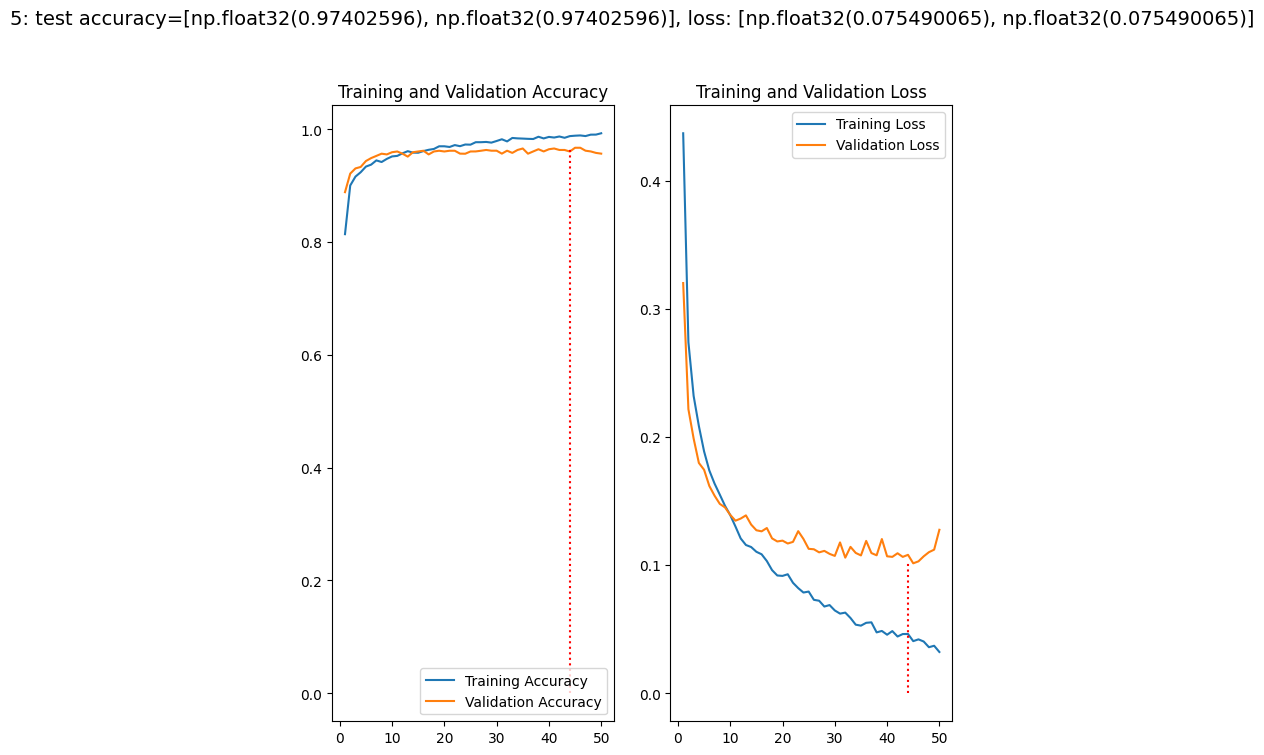

In [8]:
trainer2.test()

trainer2.plot_performance("task4_model_regularized", 5)

***
#### Q4: Compare the performance of the model with and without regularization. Where do you see improvements?


The accuracy for both training and validation increased, while the loss decreased.

### 4 Data Augmentation
#### 4.1 Advanced Data Pre-Processing
You will enhance generalization of the network by artificially adding more variety to the training data. Implement data augmentation in **get_transforms** method of **my_datamodule**. Have a look at [torchvision transforms](https://pytorch.org/vision/stable/transforms.html) and choose at least three data augmentation techniques.

In [9]:
dm2 = my_datamodule.DataModule(
    data_dir='facemask',
    img_size=64,
    batch_size=64,
    augmented=True,
    num_workers=4
)

#### 4.2 Activation Maps before Training
Create a model with a dropout rate of **60%** and batch normalization. Use a learning rate of approximately **0.0007**. Call the model **'model_augmented'**.

The convolutional layers in the network are initialised with random values. We are going to compare the activation maps before and after the training process. Use ***utils.plot_activation_maps(..)*** to plot some untrained activation maps and filter kernels of the third model. 

Get two image sample of the augmented training dataset with **sample=dm2.train_dataset[...][0]**, one with a mask and one without a mask. Pass each image sample to ***utils.plot_activation_maps(..)***.


***Submission:*** Save the activation maps of the untrained model as **task4_face_activation_maps_before.png** and **task4_mask_activation_maps_before.png** using ***utils.plot_activation_maps(..)***



Total convolutional layers: 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Total convolutional layers: 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.84313726].


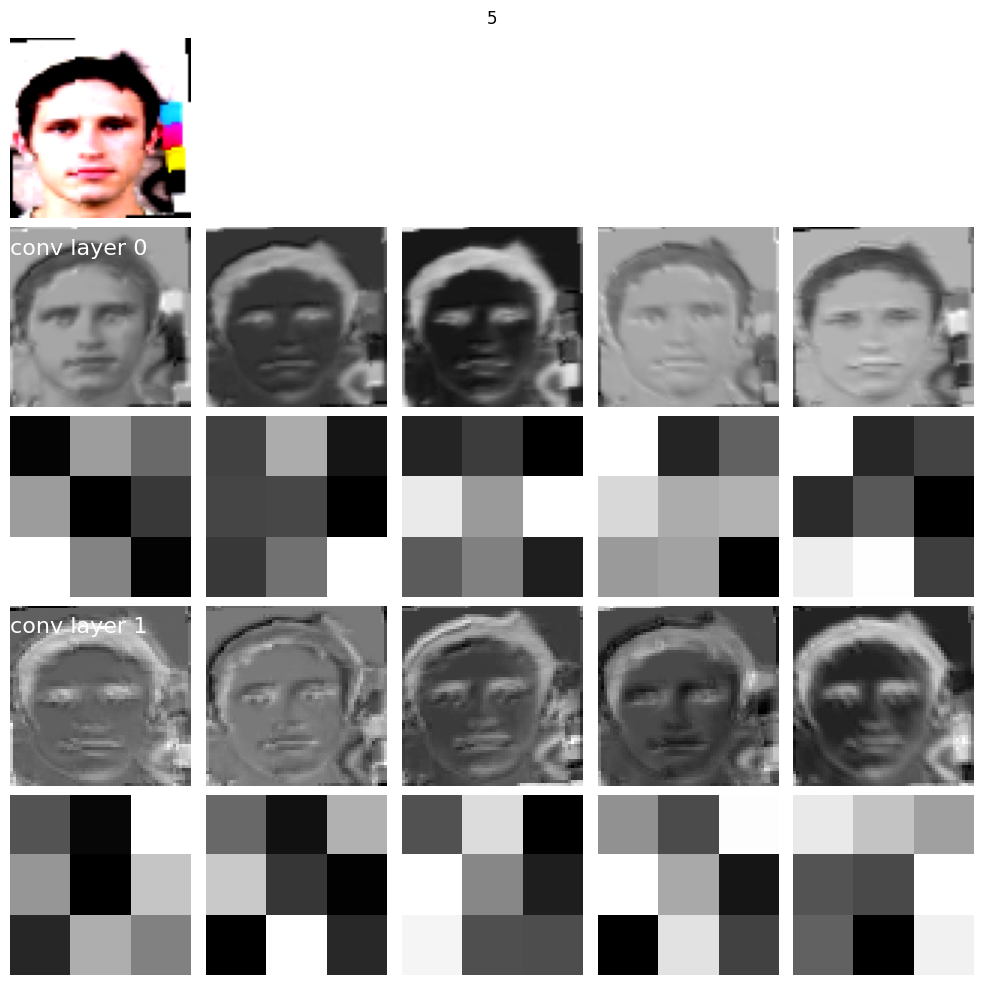

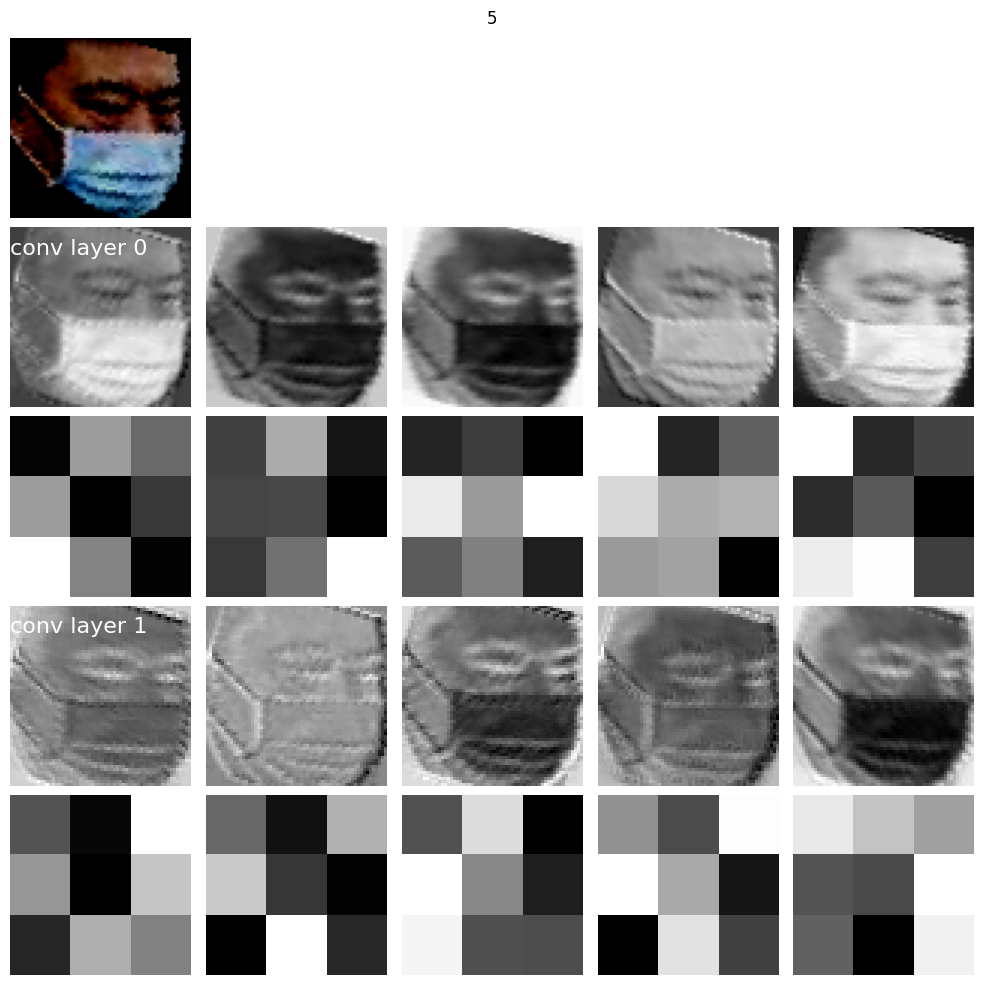

In [10]:
model_augmented = my_model.MaskClassifier(
    name='model_augmented',
    img_size=64,
    dropout=0.6,
    batch_norm=True
)

train_dataset = dm2.train_dataset
sample_face = None
sample_mask = None

for i in range(len(train_dataset)):
    img, label = train_dataset[i]
    if label == 0 and sample_face is None:
        sample_face = img
    elif label == 1 and sample_mask is None:
        sample_mask = img
    if sample_face is not None and sample_mask is not None:
        break

utils.plot_activation_maps(model_augmented, sample_face, name="task4_face_activation_maps_before.png", group_no=5)
utils.plot_activation_maps(model_augmented, sample_mask, name="task4_mask_activation_maps_before.png", group_no=5)

#### 4.3 Training the network
Create a third trainer object and train the third network here using the augmented datamodule. Set the epochs to around **100**.

Depending on your hardware this might take longer than the last training sessions.

In [11]:
trainer3 = my_trainer.Trainer(
    model=model_augmented,
    datamodule=dm2,
    gpu=True,
)

trainer3.fit(epochs=100, lr=0.0007)

Epoch 0: 100%|██████████| 42/42 [00:21<00:00,  1.95it/s]


Epoch 0 Training: Loss: 0.350710391998291 Accuracy: 0.8580013513565063
Epoch 0 Validation: Loss: 0.2178439348936081 Accuracy: 0.9437499642372131


Epoch 1: 100%|██████████| 42/42 [00:22<00:00,  1.90it/s]


Epoch 1 Training: Loss: 0.22304648160934448 Accuracy: 0.9209592938423157
Epoch 1 Validation: Loss: 0.16686426103115082 Accuracy: 0.9451389312744141


Epoch 2: 100%|██████████| 42/42 [00:22<00:00,  1.84it/s]


Epoch 2 Training: Loss: 0.2102757841348648 Accuracy: 0.9219894409179688
Epoch 2 Validation: Loss: 0.16054938733577728 Accuracy: 0.9516493678092957


Epoch 3: 100%|██████████| 42/42 [00:24<00:00,  1.72it/s]


Epoch 3 Training: Loss: 0.1927311271429062 Accuracy: 0.9294298887252808
Epoch 3 Validation: Loss: 0.14054568111896515 Accuracy: 0.9529514312744141


Epoch 4: 100%|██████████| 42/42 [00:21<00:00,  1.96it/s]


Epoch 4 Training: Loss: 0.17904801666736603 Accuracy: 0.9294298887252808
Epoch 4 Validation: Loss: 0.12687896192073822 Accuracy: 0.9541666507720947


Epoch 5: 100%|██████████| 42/42 [00:21<00:00,  1.99it/s]


Epoch 5 Training: Loss: 0.16477712988853455 Accuracy: 0.9360405206680298
Epoch 5 Validation: Loss: 0.12104292958974838 Accuracy: 0.9568576812744141


Epoch 6: 100%|██████████| 42/42 [00:22<00:00,  1.85it/s]


Epoch 6 Training: Loss: 0.15482211112976074 Accuracy: 0.935926079750061
Epoch 6 Validation: Loss: 0.11815690994262695 Accuracy: 0.9542534947395325


Epoch 7: 100%|██████████| 42/42 [00:21<00:00,  1.96it/s]


Epoch 7 Training: Loss: 0.16054551303386688 Accuracy: 0.9413346648216248
Epoch 7 Validation: Loss: 0.1141841784119606 Accuracy: 0.9594618678092957


Epoch 8: 100%|██████████| 42/42 [00:22<00:00,  1.84it/s]


Epoch 8 Training: Loss: 0.1499122679233551 Accuracy: 0.9441391825675964
Epoch 8 Validation: Loss: 0.1074279174208641 Accuracy: 0.9659722447395325


Epoch 9: 100%|██████████| 42/42 [00:23<00:00,  1.81it/s]


Epoch 9 Training: Loss: 0.14162099361419678 Accuracy: 0.9472870826721191
Epoch 9 Validation: Loss: 0.12510067224502563 Accuracy: 0.9540798664093018


Epoch 10: 100%|██████████| 42/42 [00:21<00:00,  1.94it/s]


Epoch 10 Training: Loss: 0.14273588359355927 Accuracy: 0.9465430378913879
Epoch 10 Validation: Loss: 0.10381118208169937 Accuracy: 0.9672743678092957


Epoch 11: 100%|██████████| 42/42 [00:12<00:00,  3.32it/s]


Epoch 11 Training: Loss: 0.1407926231622696 Accuracy: 0.9417353272438049
Epoch 11 Validation: Loss: 0.11064890772104263 Accuracy: 0.9594618678092957


Epoch 12: 100%|██████████| 42/42 [00:21<00:00,  1.96it/s]


Epoch 12 Training: Loss: 0.1303214579820633 Accuracy: 0.9476590752601624
Epoch 12 Validation: Loss: 0.10119340568780899 Accuracy: 0.9672743678092957


Epoch 13: 100%|██████████| 42/42 [00:21<00:00,  1.92it/s]


Epoch 13 Training: Loss: 0.12573076784610748 Accuracy: 0.9541552662849426
Epoch 13 Validation: Loss: 0.0954875648021698 Accuracy: 0.9646701812744141


Epoch 14: 100%|██████████| 42/42 [00:22<00:00,  1.89it/s]


Epoch 14 Training: Loss: 0.12345840036869049 Accuracy: 0.9549851417541504
Epoch 14 Validation: Loss: 0.09940778464078903 Accuracy: 0.9645833373069763


Epoch 15: 100%|██████████| 42/42 [00:21<00:00,  1.95it/s]


Epoch 15 Training: Loss: 0.12800700962543488 Accuracy: 0.9489468932151794
Epoch 15 Validation: Loss: 0.08803978562355042 Accuracy: 0.9711806178092957


Epoch 16: 100%|██████████| 42/42 [00:21<00:00,  1.95it/s]


Epoch 16 Training: Loss: 0.12429079413414001 Accuracy: 0.9562156200408936
Epoch 16 Validation: Loss: 0.08480655401945114 Accuracy: 0.9724826812744141


Epoch 17: 100%|██████████| 42/42 [00:22<00:00,  1.86it/s]


Epoch 17 Training: Loss: 0.11041593551635742 Accuracy: 0.9590201377868652
Epoch 17 Validation: Loss: 0.0904981791973114 Accuracy: 0.9657986164093018


Epoch 18: 100%|██████████| 42/42 [00:24<00:00,  1.71it/s]


Epoch 18 Training: Loss: 0.10528986901044846 Accuracy: 0.9621680378913879
Epoch 18 Validation: Loss: 0.07858841121196747 Accuracy: 0.9711806178092957


Epoch 19: 100%|██████████| 42/42 [00:28<00:00,  1.49it/s]


Epoch 19 Training: Loss: 0.11529302597045898 Accuracy: 0.9586195349693298
Epoch 19 Validation: Loss: 0.10228059440851212 Accuracy: 0.9673611521720886


Epoch 20: 100%|██████████| 42/42 [00:26<00:00,  1.58it/s]


Epoch 20 Training: Loss: 0.10309277474880219 Accuracy: 0.9603078961372375
Epoch 20 Validation: Loss: 0.07981901615858078 Accuracy: 0.972569465637207


Epoch 21: 100%|██████████| 42/42 [00:26<00:00,  1.57it/s]


Epoch 21 Training: Loss: 0.10978396981954575 Accuracy: 0.9563015699386597
Epoch 21 Validation: Loss: 0.09275060147047043 Accuracy: 0.968663215637207


Epoch 22: 100%|██████████| 42/42 [00:26<00:00,  1.58it/s]


Epoch 22 Training: Loss: 0.11224519461393356 Accuracy: 0.955643355846405
Epoch 22 Validation: Loss: 0.097506582736969 Accuracy: 0.968663215637207


Epoch 23: 100%|██████████| 42/42 [00:27<00:00,  1.52it/s]


Epoch 23 Training: Loss: 0.11561267822980881 Accuracy: 0.956501841545105
Epoch 23 Validation: Loss: 0.08349353820085526 Accuracy: 0.9685764312744141


Epoch 24: 100%|██████████| 42/42 [00:26<00:00,  1.58it/s]


Epoch 24 Training: Loss: 0.10876648873090744 Accuracy: 0.9599358439445496
Epoch 24 Validation: Loss: 0.07438144832849503 Accuracy: 0.9698784947395325


Epoch 25: 100%|██████████| 42/42 [00:24<00:00,  1.69it/s]


Epoch 25 Training: Loss: 0.10739302635192871 Accuracy: 0.9573317170143127
Epoch 25 Validation: Loss: 0.07339219003915787 Accuracy: 0.9763889312744141


Epoch 26: 100%|██████████| 42/42 [00:11<00:00,  3.61it/s]


Epoch 26 Training: Loss: 0.10160257667303085 Accuracy: 0.9607658386230469
Epoch 26 Validation: Loss: 0.07960812002420425 Accuracy: 0.9724826812744141


Epoch 27: 100%|██████████| 42/42 [00:10<00:00,  4.19it/s]


Epoch 27 Training: Loss: 0.09758037328720093 Accuracy: 0.9607658386230469
Epoch 27 Validation: Loss: 0.08133009821176529 Accuracy: 0.9751736521720886


Epoch 28: 100%|██████████| 42/42 [00:16<00:00,  2.55it/s]


Epoch 28 Training: Loss: 0.09577488899230957 Accuracy: 0.9620535969734192
Epoch 28 Validation: Loss: 0.09256932139396667 Accuracy: 0.9712674021720886


Epoch 29: 100%|██████████| 42/42 [00:16<00:00,  2.53it/s]


Epoch 29 Training: Loss: 0.10001028329133987 Accuracy: 0.9608516693115234
Epoch 29 Validation: Loss: 0.09917382150888443 Accuracy: 0.9660590291023254


Epoch 30: 100%|██████████| 42/42 [00:09<00:00,  4.49it/s]


Epoch 30 Training: Loss: 0.09526468813419342 Accuracy: 0.963942289352417
Epoch 30 Validation: Loss: 0.06678914278745651 Accuracy: 0.980381965637207


Epoch 31: 100%|██████████| 42/42 [00:09<00:00,  4.31it/s]


Epoch 31 Training: Loss: 0.08265356719493866 Accuracy: 0.9694368243217468
Epoch 31 Validation: Loss: 0.07879244536161423 Accuracy: 0.9673611521720886


Epoch 32: 100%|██████████| 42/42 [00:11<00:00,  3.81it/s]


Epoch 32 Training: Loss: 0.09092307090759277 Accuracy: 0.9668898582458496
Epoch 32 Validation: Loss: 0.07776104658842087 Accuracy: 0.9751736521720886


Epoch 33: 100%|██████████| 42/42 [00:09<00:00,  4.32it/s]


Epoch 33 Training: Loss: 0.0969165712594986 Accuracy: 0.9651442170143127
Epoch 33 Validation: Loss: 0.06686697155237198 Accuracy: 0.980381965637207


Epoch 34: 100%|██████████| 42/42 [00:09<00:00,  4.21it/s]


Epoch 34 Training: Loss: 0.08463471382856369 Accuracy: 0.9722985625267029
Epoch 34 Validation: Loss: 0.07347764819860458 Accuracy: 0.980381965637207


Epoch 35: 100%|██████████| 42/42 [00:09<00:00,  4.30it/s]


Epoch 35 Training: Loss: 0.08905438333749771 Accuracy: 0.9647721648216248
Epoch 35 Validation: Loss: 0.07419589906930923 Accuracy: 0.9749999642372131


Epoch 36: 100%|██████████| 42/42 [00:11<00:00,  3.63it/s]


Epoch 36 Training: Loss: 0.09600821137428284 Accuracy: 0.9652301073074341
Epoch 36 Validation: Loss: 0.08632757514715195 Accuracy: 0.972569465637207


Epoch 37: 100%|██████████| 42/42 [00:15<00:00,  2.70it/s]


Epoch 37 Training: Loss: 0.08082197606563568 Accuracy: 0.971268355846405
Epoch 37 Validation: Loss: 0.07301082462072372 Accuracy: 0.9829861521720886


Epoch 38: 100%|██████████| 42/42 [00:09<00:00,  4.35it/s]


Epoch 38 Training: Loss: 0.0897965058684349 Accuracy: 0.965029776096344
Epoch 38 Validation: Loss: 0.07059770077466965 Accuracy: 0.976475715637207


Epoch 39: 100%|██████████| 42/42 [00:10<00:00,  3.99it/s]


Epoch 39 Training: Loss: 0.09212115406990051 Accuracy: 0.966804027557373
Epoch 39 Validation: Loss: 0.0743403509259224 Accuracy: 0.976475715637207


Epoch 40: 100%|██████████| 42/42 [00:10<00:00,  4.16it/s]


Epoch 40 Training: Loss: 0.07925380766391754 Accuracy: 0.9709821343421936
Epoch 40 Validation: Loss: 0.06379631906747818 Accuracy: 0.9776909947395325


Epoch 41: 100%|██████████| 42/42 [00:11<00:00,  3.52it/s]


Epoch 41 Training: Loss: 0.08286567032337189 Accuracy: 0.9701522588729858
Epoch 41 Validation: Loss: 0.08865315467119217 Accuracy: 0.9699652791023254


Epoch 42: 100%|██████████| 42/42 [00:09<00:00,  4.50it/s]


Epoch 42 Training: Loss: 0.09164755046367645 Accuracy: 0.9666323065757751
Epoch 42 Validation: Loss: 0.07492049783468246 Accuracy: 0.9777777791023254


Epoch 43: 100%|██████████| 42/42 [00:09<00:00,  4.38it/s]


Epoch 43 Training: Loss: 0.06977056711912155 Accuracy: 0.9741587042808533
Epoch 43 Validation: Loss: 0.07113787531852722 Accuracy: 0.976475715637207


Epoch 44: 100%|██████████| 42/42 [00:22<00:00,  1.84it/s]


Epoch 44 Training: Loss: 0.07588277757167816 Accuracy: 0.9674622416496277
Epoch 44 Validation: Loss: 0.07804002612829208 Accuracy: 0.9738715291023254


Epoch 45: 100%|██████████| 42/42 [00:24<00:00,  1.70it/s]


Epoch 45 Training: Loss: 0.09661830961704254 Accuracy: 0.963083803653717
Epoch 45 Validation: Loss: 0.06704391539096832 Accuracy: 0.9776909947395325


Epoch 46: 100%|██████████| 42/42 [00:09<00:00,  4.25it/s]


Epoch 46 Training: Loss: 0.08007986098527908 Accuracy: 0.9703525304794312
Epoch 46 Validation: Loss: 0.07097173482179642 Accuracy: 0.9790799021720886


Epoch 47: 100%|██████████| 42/42 [00:09<00:00,  4.25it/s]


Epoch 47 Training: Loss: 0.08404330164194107 Accuracy: 0.9691506624221802
Epoch 47 Validation: Loss: 0.06533947587013245 Accuracy: 0.980381965637207


Epoch 48: 100%|██████████| 42/42 [00:11<00:00,  3.78it/s]


Epoch 48 Training: Loss: 0.06365326792001724 Accuracy: 0.9757326245307922
Epoch 48 Validation: Loss: 0.06875665485858917 Accuracy: 0.980381965637207


Epoch 49: 100%|██████████| 42/42 [00:11<00:00,  3.52it/s]


Epoch 49 Training: Loss: 0.0854916200041771 Accuracy: 0.9666323065757751
Epoch 49 Validation: Loss: 0.0703047439455986 Accuracy: 0.9777777791023254


Epoch 50: 100%|██████████| 42/42 [00:11<00:00,  3.63it/s]


Epoch 50 Training: Loss: 0.08163388073444366 Accuracy: 0.971268355846405
Epoch 50 Validation: Loss: 0.06353052705526352 Accuracy: 0.976475715637207


Epoch 51: 100%|██████████| 42/42 [00:11<00:00,  3.82it/s]


Epoch 51 Training: Loss: 0.06241891533136368 Accuracy: 0.9789950251579285
Epoch 51 Validation: Loss: 0.06194230914115906 Accuracy: 0.9829861521720886


Epoch 52: 100%|██████████| 42/42 [00:13<00:00,  3.16it/s]


Epoch 52 Training: Loss: 0.08767127990722656 Accuracy: 0.9670902490615845
Epoch 52 Validation: Loss: 0.05697847902774811 Accuracy: 0.9868924021720886


Epoch 53: 100%|██████████| 42/42 [00:09<00:00,  4.47it/s]


Epoch 53 Training: Loss: 0.08931618928909302 Accuracy: 0.9675766825675964
Epoch 53 Validation: Loss: 0.08492103964090347 Accuracy: 0.9699652791023254


Epoch 54: 100%|██████████| 42/42 [00:09<00:00,  4.35it/s]


Epoch 54 Training: Loss: 0.08216972649097443 Accuracy: 0.9670042991638184
Epoch 54 Validation: Loss: 0.06723202764987946 Accuracy: 0.976475715637207


Epoch 55: 100%|██████████| 42/42 [00:09<00:00,  4.40it/s]


Epoch 55 Training: Loss: 0.07945653051137924 Accuracy: 0.9694940447807312
Epoch 55 Validation: Loss: 0.06653424352407455 Accuracy: 0.9816840291023254


Epoch 56: 100%|██████████| 42/42 [00:09<00:00,  4.42it/s]


Epoch 56 Training: Loss: 0.0705399215221405 Accuracy: 0.9716403484344482
Epoch 56 Validation: Loss: 0.05780404806137085 Accuracy: 0.9868924021720886


Epoch 57: 100%|██████████| 42/42 [00:09<00:00,  4.24it/s]


Epoch 57 Training: Loss: 0.08288615942001343 Accuracy: 0.9690362215042114
Epoch 57 Validation: Loss: 0.06661685556173325 Accuracy: 0.9816840291023254


Epoch 58: 100%|██████████| 42/42 [00:10<00:00,  4.09it/s]


Epoch 58 Training: Loss: 0.06480354815721512 Accuracy: 0.9725846648216248
Epoch 58 Validation: Loss: 0.1011224314570427 Accuracy: 0.9672743678092957


Epoch 59: 100%|██████████| 42/42 [00:09<00:00,  4.51it/s]


Epoch 59 Training: Loss: 0.07507622241973877 Accuracy: 0.9731284379959106
Epoch 59 Validation: Loss: 0.060092002153396606 Accuracy: 0.9829861521720886


Epoch 60: 100%|██████████| 42/42 [00:09<00:00,  4.65it/s]


Epoch 60 Training: Loss: 0.07666534185409546 Accuracy: 0.9709821343421936
Epoch 60 Validation: Loss: 0.0795869454741478 Accuracy: 0.980381965637207


Epoch 61: 100%|██████████| 42/42 [00:09<00:00,  4.31it/s]


Epoch 61 Training: Loss: 0.06098933517932892 Accuracy: 0.978708803653717
Epoch 61 Validation: Loss: 0.07631158083677292 Accuracy: 0.9777777791023254


Epoch 62: 100%|██████████| 42/42 [00:12<00:00,  3.41it/s]


Epoch 62 Training: Loss: 0.06886083632707596 Accuracy: 0.976190447807312
Epoch 62 Validation: Loss: 0.07082466781139374 Accuracy: 0.9736979007720947


Epoch 63: 100%|██████████| 42/42 [00:22<00:00,  1.88it/s]


Epoch 63 Training: Loss: 0.06339026987552643 Accuracy: 0.9753605723381042
Epoch 63 Validation: Loss: 0.0687141865491867 Accuracy: 0.984288215637207


Epoch 64: 100%|██████████| 42/42 [00:20<00:00,  2.06it/s]


Epoch 64 Training: Loss: 0.07146911323070526 Accuracy: 0.9758184552192688
Epoch 64 Validation: Loss: 0.07933995872735977 Accuracy: 0.9790799021720886


Epoch 65: 100%|██████████| 42/42 [00:12<00:00,  3.40it/s]


Epoch 65 Training: Loss: 0.07488774508237839 Accuracy: 0.9693223834037781
Epoch 65 Validation: Loss: 0.08673599362373352 Accuracy: 0.976475715637207


Epoch 66: 100%|██████████| 42/42 [00:09<00:00,  4.35it/s]


Epoch 66 Training: Loss: 0.07861167192459106 Accuracy: 0.9742445349693298
Epoch 66 Validation: Loss: 0.05840548872947693 Accuracy: 0.9816840291023254


Epoch 67: 100%|██████████| 42/42 [00:12<00:00,  3.48it/s]


Epoch 67 Training: Loss: 0.06306716054677963 Accuracy: 0.9761046171188354
Epoch 67 Validation: Loss: 0.0841171145439148 Accuracy: 0.9738715291023254


Epoch 68: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]


Epoch 68 Training: Loss: 0.06594550609588623 Accuracy: 0.9732142686843872
Epoch 68 Validation: Loss: 0.07104909420013428 Accuracy: 0.976475715637207


Epoch 69: 100%|██████████| 42/42 [00:10<00:00,  4.19it/s]


Epoch 69 Training: Loss: 0.073829285800457 Accuracy: 0.9745306968688965
Epoch 69 Validation: Loss: 0.0702233836054802 Accuracy: 0.9776909947395325


Epoch 70: 100%|██████████| 42/42 [00:10<00:00,  3.89it/s]


Epoch 70 Training: Loss: 0.06410719454288483 Accuracy: 0.9758184552192688
Epoch 70 Validation: Loss: 0.07344892621040344 Accuracy: 0.9777777791023254


Epoch 71: 100%|██████████| 42/42 [00:14<00:00,  2.81it/s]


Epoch 71 Training: Loss: 0.06609729677438736 Accuracy: 0.9786229729652405
Epoch 71 Validation: Loss: 0.05295940116047859 Accuracy: 0.980381965637207


Epoch 72: 100%|██████████| 42/42 [00:19<00:00,  2.13it/s]


Epoch 72 Training: Loss: 0.06023896858096123 Accuracy: 0.9758184552192688
Epoch 72 Validation: Loss: 0.05579520761966705 Accuracy: 0.984288215637207


Epoch 73: 100%|██████████| 42/42 [00:12<00:00,  3.23it/s]


Epoch 73 Training: Loss: 0.0636555403470993 Accuracy: 0.9787946343421936
Epoch 73 Validation: Loss: 0.0814346969127655 Accuracy: 0.9790799021720886


Epoch 74: 100%|██████████| 42/42 [00:10<00:00,  3.85it/s]


Epoch 74 Training: Loss: 0.06219550594687462 Accuracy: 0.978708803653717
Epoch 74 Validation: Loss: 0.06450068205595016 Accuracy: 0.9829861521720886


Epoch 75: 100%|██████████| 42/42 [00:09<00:00,  4.35it/s]


Epoch 75 Training: Loss: 0.057566188275814056 Accuracy: 0.9760187864303589
Epoch 75 Validation: Loss: 0.06791172176599503 Accuracy: 0.9816840291023254


Epoch 76: 100%|██████████| 42/42 [00:09<00:00,  4.37it/s]


Epoch 76 Training: Loss: 0.05665763095021248 Accuracy: 0.979080855846405
Epoch 76 Validation: Loss: 0.07415029406547546 Accuracy: 0.9829861521720886


Epoch 77: 100%|██████████| 42/42 [00:09<00:00,  4.45it/s]


Epoch 77 Training: Loss: 0.06573379039764404 Accuracy: 0.9772207140922546
Epoch 77 Validation: Loss: 0.06568490713834763 Accuracy: 0.9777777791023254


Epoch 78: 100%|██████████| 42/42 [00:10<00:00,  4.20it/s]


Epoch 78 Training: Loss: 0.05736600235104561 Accuracy: 0.9773065447807312
Epoch 78 Validation: Loss: 0.057994503527879715 Accuracy: 0.984288215637207


Epoch 79: 100%|██████████| 42/42 [00:09<00:00,  4.24it/s]


Epoch 79 Training: Loss: 0.06261632591485977 Accuracy: 0.9749027490615845
Epoch 79 Validation: Loss: 0.08157937228679657 Accuracy: 0.972569465637207


Epoch 80: 100%|██████████| 42/42 [00:23<00:00,  1.79it/s]


Epoch 80 Training: Loss: 0.057010576128959656 Accuracy: 0.9776785969734192
Epoch 80 Validation: Loss: 0.06454506516456604 Accuracy: 0.9816840291023254


Epoch 81: 100%|██████████| 42/42 [00:13<00:00,  3.16it/s]


Epoch 81 Training: Loss: 0.05829113349318504 Accuracy: 0.9775927662849426
Epoch 81 Validation: Loss: 0.08013615012168884 Accuracy: 0.9790799021720886


Epoch 82: 100%|██████████| 42/42 [00:09<00:00,  4.36it/s]


Epoch 82 Training: Loss: 0.06276531517505646 Accuracy: 0.9742445349693298
Epoch 82 Validation: Loss: 0.06364932656288147 Accuracy: 0.988194465637207


Epoch 83: 100%|██████████| 42/42 [00:09<00:00,  4.39it/s]


Epoch 83 Training: Loss: 0.055560436099767685 Accuracy: 0.9801968932151794
Epoch 83 Validation: Loss: 0.06007079407572746 Accuracy: 0.9829861521720886


Epoch 84: 100%|██████████| 42/42 [00:09<00:00,  4.29it/s]


Epoch 84 Training: Loss: 0.050183478742837906 Accuracy: 0.9812271595001221
Epoch 84 Validation: Loss: 0.05891226604580879 Accuracy: 0.9868924021720886


Epoch 85: 100%|██████████| 42/42 [00:09<00:00,  4.32it/s]


Epoch 85 Training: Loss: 0.05653608590364456 Accuracy: 0.9780505895614624
Epoch 85 Validation: Loss: 0.07081031799316406 Accuracy: 0.9777777791023254


Epoch 86: 100%|██████████| 42/42 [00:10<00:00,  4.09it/s]


Epoch 86 Training: Loss: 0.07355175167322159 Accuracy: 0.9713541865348816
Epoch 86 Validation: Loss: 0.07541538029909134 Accuracy: 0.9777777791023254


Epoch 87: 100%|██████████| 42/42 [00:09<00:00,  4.51it/s]


Epoch 87 Training: Loss: 0.06697054207324982 Accuracy: 0.974988579750061
Epoch 87 Validation: Loss: 0.04799488186836243 Accuracy: 0.9855902791023254


Epoch 88: 100%|██████████| 42/42 [00:09<00:00,  4.38it/s]


Epoch 88 Training: Loss: 0.05687642842531204 Accuracy: 0.9778789281845093
Epoch 88 Validation: Loss: 0.06651594489812851 Accuracy: 0.9790799021720886


Epoch 89: 100%|██████████| 42/42 [00:09<00:00,  4.23it/s]


Epoch 89 Training: Loss: 0.06297152489423752 Accuracy: 0.9757326245307922
Epoch 89 Validation: Loss: 0.054341401904821396 Accuracy: 0.984288215637207


Epoch 90: 100%|██████████| 42/42 [00:10<00:00,  4.17it/s]


Epoch 90 Training: Loss: 0.05575541779398918 Accuracy: 0.9810267686843872
Epoch 90 Validation: Loss: 0.05471958592534065 Accuracy: 0.9829861521720886


Epoch 91: 100%|██████████| 42/42 [00:09<00:00,  4.42it/s]


Epoch 91 Training: Loss: 0.047149691730737686 Accuracy: 0.9831730723381042
Epoch 91 Validation: Loss: 0.08325525373220444 Accuracy: 0.9751736521720886


Epoch 92: 100%|██████████| 42/42 [00:09<00:00,  4.22it/s]


Epoch 92 Training: Loss: 0.06709475070238113 Accuracy: 0.979080855846405
Epoch 92 Validation: Loss: 0.06766005605459213 Accuracy: 0.9790799021720886


Epoch 93: 100%|██████████| 42/42 [00:09<00:00,  4.40it/s]


Epoch 93 Training: Loss: 0.05771224945783615 Accuracy: 0.9775069355964661
Epoch 93 Validation: Loss: 0.0640915110707283 Accuracy: 0.9829861521720886


Epoch 94: 100%|██████████| 42/42 [00:09<00:00,  4.27it/s]


Epoch 94 Training: Loss: 0.05945912003517151 Accuracy: 0.9789950251579285
Epoch 94 Validation: Loss: 0.06871802359819412 Accuracy: 0.9763889312744141


Epoch 95: 100%|██████████| 42/42 [00:16<00:00,  2.62it/s]


Epoch 95 Training: Loss: 0.06053479015827179 Accuracy: 0.9765625
Epoch 95 Validation: Loss: 0.06435022503137589 Accuracy: 0.9816840291023254


Epoch 96: 100%|██████████| 42/42 [00:10<00:00,  4.17it/s]


Epoch 96 Training: Loss: 0.05740577355027199 Accuracy: 0.9765625
Epoch 96 Validation: Loss: 0.05122694745659828 Accuracy: 0.988194465637207


Epoch 97: 100%|██████████| 42/42 [00:10<00:00,  4.04it/s]


Epoch 97 Training: Loss: 0.055462319403886795 Accuracy: 0.9813988208770752
Epoch 97 Validation: Loss: 0.07469349354505539 Accuracy: 0.9751736521720886


Epoch 98: 100%|██████████| 42/42 [00:13<00:00,  3.20it/s]


Epoch 98 Training: Loss: 0.06182492524385452 Accuracy: 0.9732428789138794
Epoch 98 Validation: Loss: 0.059578537940979004 Accuracy: 0.984288215637207


Epoch 99: 100%|██████████| 42/42 [00:22<00:00,  1.85it/s]


Epoch 99 Training: Loss: 0.05590338259935379 Accuracy: 0.979080855846405
Epoch 99 Validation: Loss: 0.05825626850128174 Accuracy: 0.984288215637207


#### 4.4. Performance Evaluation 
Plot the model performance of the third model with ***trainer3.plot_performance(..)***.

***Submission:*** Save the output of ***model.plot_curve(..)*** as **task4_model_augmented.png**

d:\uni\CV\CV_Assignment2_Group5\TASK4\my_trainer.py:220: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(self._get_path()))


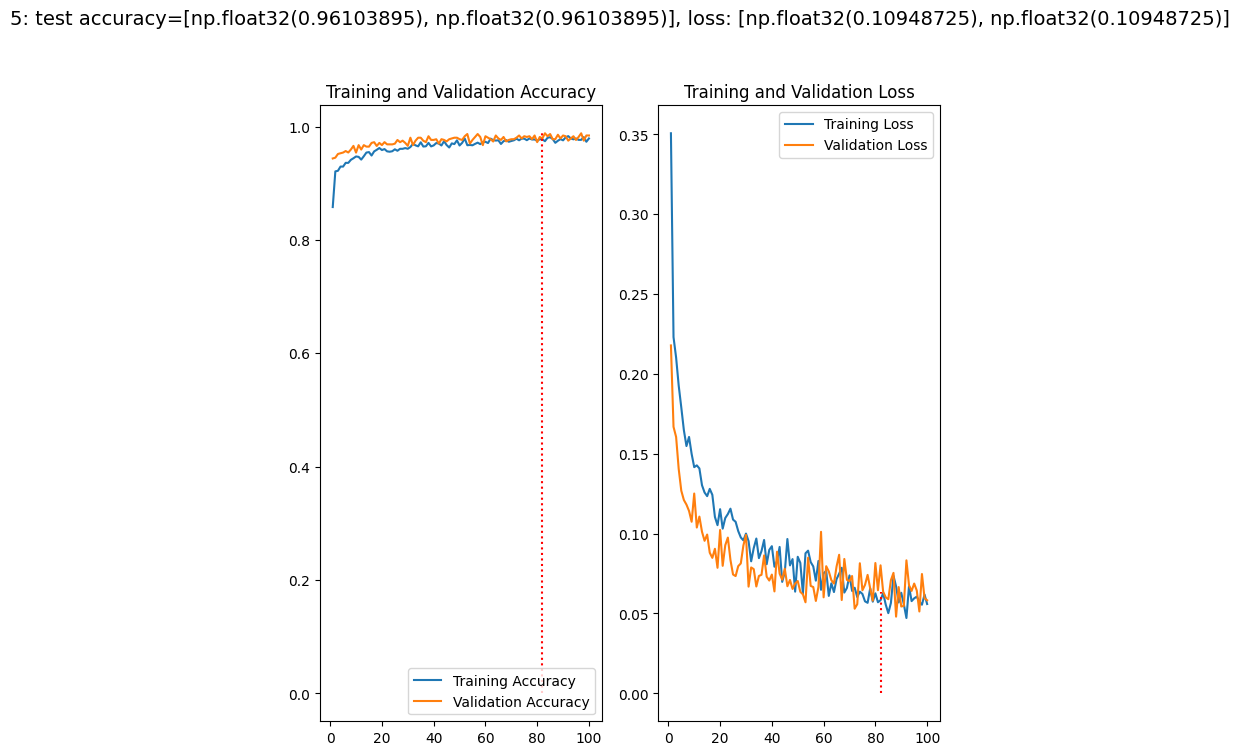

In [12]:
trainer3.test()

trainer3.plot_performance("task4_model_augmented", 5)

***
#### Q5: Look at the performance of the third model over time, what do you observe compared to the first two models? Explain underfitting/overfitting based on your plots.

#ANSWER HERE

#### 4.5 Activation Maps after Training
During training the weights of the model are adapted to the feature distribution of the training dataset. Plot some activation maps of the third model again using ***utils.plot_activation_maps(..)***. Use the same image samples you used before.

***Submission:*** Save the activation maps after the training as **task4_mask_activation_maps_after.png** and **task4_face_activation_maps_after.png** using ***utils.plot_activation_maps(..)***

Total convolutional layers: 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Total convolutional layers: 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.84313726].


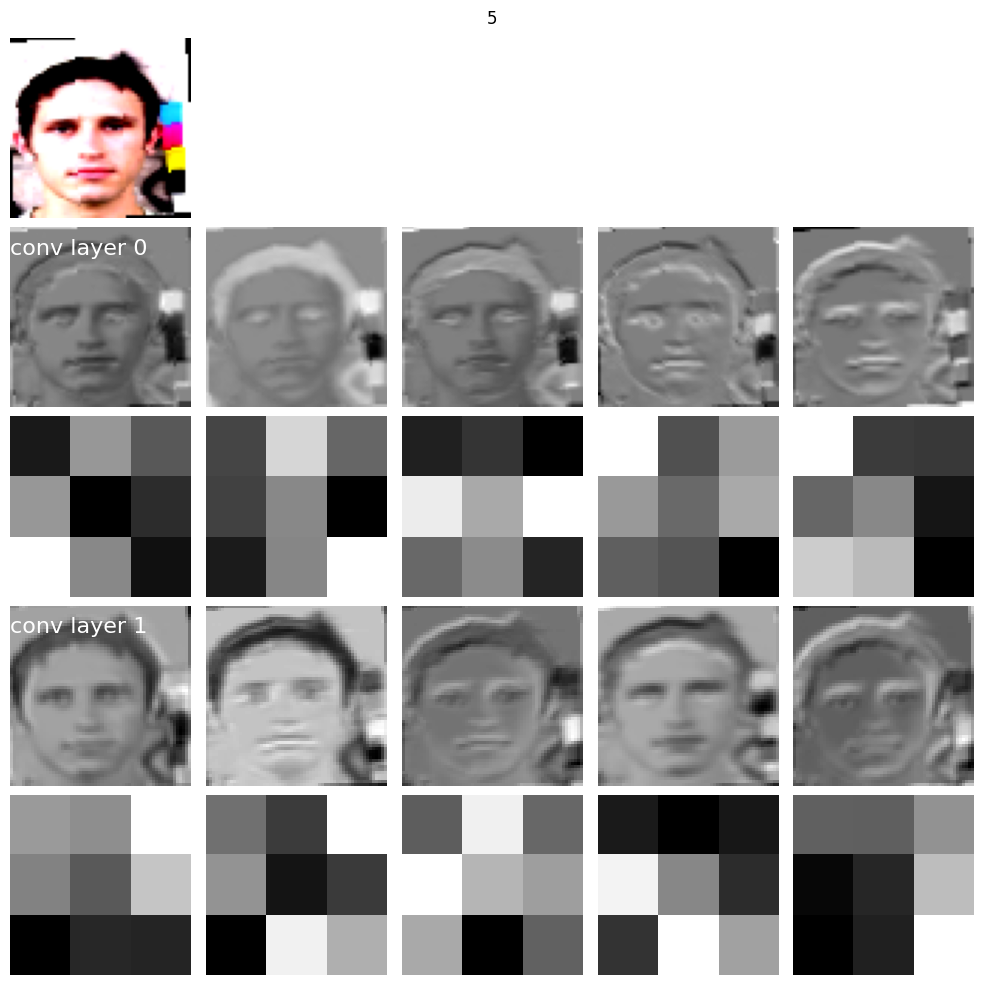

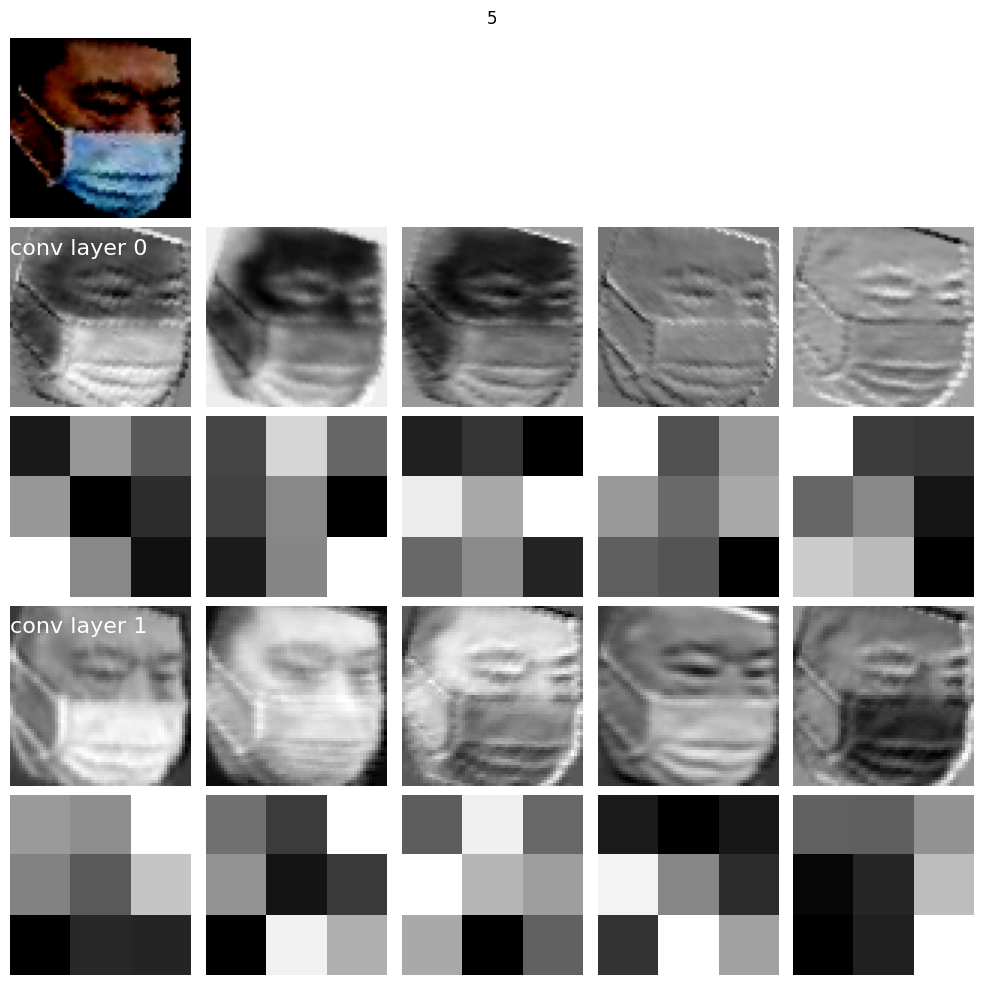

In [13]:
utils.plot_activation_maps(model_augmented.cpu(), sample_face, name="task4_face_activation_maps_after.png", group_no=5)
utils.plot_activation_maps(model_augmented.cpu(), sample_mask, name="task4_mask_activation_maps_after.png",group_no=5)

***
#### Q6: The activations and filter kernels after the training have changed, what do you observe? Explain possible reasons.


#ANSWER HERE 

### 5 Evaluation

Calculate the confusion matrix. You can use the function **confusion_matrix** from **sklearn.metrics**. A confusion matrix within a binary decision problem shows:
 - "true positive" for correctly predicted event values.
 - "false positive" for incorrectly predicted event values.
 - "true negative" for correctly predicted no-event values.
 - "false negative" for incorrectly predicted no-event values.

You can obtain the test data and labes by using **X, y = next(iter(dm2.text_dataloader()))**. Use **trainer3.predict(X)** to obtain the predicted value. You can convert a tensor to a numpy array by using **y.detach().numpy()**. 

In [14]:
from sklearn.metrics import confusion_matrix

X, y = next(iter(dm2.test_dataloader()))

y_pred = trainer3.predict(X)
y_true = y.detach().numpy()

cm = confusion_matrix(y, y_pred)

cm

d:\uni\CV\CV_Assignment2_Group5\TASK4\my_trainer.py:220: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(self._get_path()))


array([[190,   3],
       [ 12, 180]])

***
#### Q7: Compare the approach for classification from TASK3 and TASK4. Discuss advantages, disadvantages, strength and weakness. 


#ANSWER HERE